## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
# reading the dataset and viewing the first 5 rows
df=pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [3]:
# viewing the shape of the data to know the number of rows
df.shape

(294478, 5)

c. The number of unique users in the dataset.

In [4]:
# calculating the number of unique users
len(df.user_id.unique())

290584

d. The proportion of users converted.

In [5]:
# finding the proportion of the users who paid for the company
len(df[df['converted']==1])/len(df)

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't line up.

In [6]:
# finding the number of all wrong data
df.query('group=="treatment" and landing_page!="new_page" or group!="treatment" and landing_page=="new_page"')

,user_id,timestamp,group,landing_page,converted
22,767017,2017-01-12 22:58:14.991443,control,new_page,0
240,733976,2017-01-11 15:11:16.407599,control,new_page,0
308,857184,2017-01-20 07:34:59.832626,treatment,old_page,0
327,686623,2017-01-09 14:26:40.734775,treatment,old_page,0
357,856078,2017-01-12 12:29:30.354835,treatment,old_page,0
...,...,...,...,...,...
294014,813406,2017-01-09 06:25:33.223301,treatment,old_page,0
294200,928506,2017-01-13 21:32:10.491309,control,new_page,0
294252,892498,2017-01-22 01:11:10.463211,treatment,old_page,0
294253,886135,2017-01-06 12:49:20.509403,control,new_page,0


f. Do any of the rows have missing values?

In [7]:
# the number of null values in any column
df.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [8]:
# remove the wrong assigned rows
df1=df.drop(df[(df.group=='treatment') & (df.landing_page=='old_page')].index)
df2=df1.drop(df1[(df1.group=='control') & (df1.landing_page=='new_page')].index)
df2.shape

(290585, 5)

In [9]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [10]:
# calculating the number of unique users in df2
len(df2.user_id.unique())

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [11]:
# finding out the repeated user and all the info about hime
df2[df2.user_id.duplicated(keep=False)]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


c. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [12]:
df2.drop(2893,inplace=True)
df2.shape

(290584, 5)

`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [13]:
# the probablity of the user to convert
len(df2[df2.converted==1])/len(df2)

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [14]:
# the probablity of the users in the control group to convert
len(df2.query('group=="control" and converted==1'))/len(df2.query('group=="control"'))

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [15]:
# the probablity of the users in the treatment group to convert
len(df2.query('group=="treatment" and converted==1'))/len(df2.query('group=="treatment"'))

0.11880806551510564

d. What is the probability that an individual received the new page?

In [16]:
# the probablity of the user receiving the new page
len(df2.query('landing_page=="new_page"'))/len(df2)

0.5000619442226688

e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

No, the treatment group is about 50% of our sample which means it's almost equal to the number of users who used the old page as well, both the probability of convertions seem very close and the old page has a better ratio also (12.03%) and the new page has less ration (11.88%)

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

null hypothesis: old page is better than or equal to the new page.
alternative hypothesis: new page is better than the old page.

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [17]:
# the $p_{new}$ convert rate is equal to the wholde dataset convert rate under the null
p_new=df2.converted.mean()
p_new

0.11959708724499628

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [18]:
# the $p_{old}$ convert rate is equal to the wholde dataset convert rate under the null
p_old=df2.converted.mean()
p_old

0.11959708724499628

c. What is $n_{new}$?

In [19]:
# number of users who got the new page
n_new=len(df2[df2.landing_page=='new_page'])
n_new

145310

d. What is $n_{old}$?

In [20]:
# number of users who got the old page
n_old=len(df2[df2.landing_page=='old_page'])
n_old

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [21]:
# simulating the n_new transictions (145310) with the p_new convert rate (0.1196)
new_page_converted=np.random.binomial(1,p_new,n_new)
new_page_converted.mean()

0.11939302181542909

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [22]:
# simulating the n_old transictions (145274) with the p_old convert rate (0.1196)
old_page_converted=np.random.binomial(1,p_old,n_old)
old_page_converted.mean()

0.11925051970758704

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [23]:
# calculating the difference between the new and old probability to convert
new_page_converted.mean()-old_page_converted.mean()

0.00014250210784204353

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [24]:
# simulating the previous steps 10,000 times
p_diffs=[]
for i in range(10000):
    new_page_converted=np.random.binomial(1,p_new,n_new)
    old_page_converted=np.random.binomial(1,p_old,n_old)
    p_diffs.append(new_page_converted.mean()-old_page_converted.mean())
p_diffs=np.array(p_diffs)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

(array([   6.,   82.,  453., 1518., 2824., 2778., 1661.,  563.,  107.,
           8.]),
 array([-4.72338770e-03, -3.78737508e-03, -2.85136246e-03, -1.91534984e-03,
        -9.79337215e-04, -4.33245942e-05,  8.92688026e-04,  1.82870065e-03,
         2.76471327e-03,  3.70072589e-03,  4.63673851e-03]),
 <BarContainer object of 10 artists>)

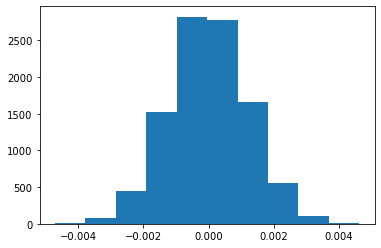

In [25]:
plt.hist(p_diffs)

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [26]:
# calculating the actual observed difference in probabilities
control_mean=len(df2.query('group=="control" and converted==1'))/len(df2.query('group=="control"'))
treatment_mean=len(df2.query('group=="treatment" and converted==1'))/len(df2.query('group=="treatment"'))
obs_diff=treatment_mean-control_mean

In [27]:
# calculating the p-value
(p_diffs>obs_diff).mean()

0.907

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

the value we just computed is the proportion of the p_diffs that are bigger than observed difference in the actual dataset it's called the *p-value* and here it's so big (about 90%) that it means we fail to reject the null hypothesis because there is a big probability to see our statistic (p_diff-obs_diff) in the null hypothesis.
this means that the old page is driving more or better convert rate than the new page.

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [28]:
import statsmodels.api as sm
import statsmodels as sm
convert_old = len(df2.query('group=="control" and converted==1'))
convert_new = len(df2.query('group=="treatment" and converted==1'))
n_old = len(df2.query('landing_page=="old_page"'))
n_new = len(df2.query('landing_page=="new_page"'))

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [29]:
# calculating the z-score and p-value
sm.stats.proportion.proportions_ztest(count=[convert_old,convert_new],nobs=[n_old,n_new], alternative='smaller')

(1.3109241984234394, 0.9050583127590245)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

the z-score describes how far is our point from the mean and if it's positive like in our situation that means that our point is above the mean which means that it's in the right side of our normal distribution curve, the p-value represents the probability to see our hypothesis in the null condition and it's equal to what we calculated earlier in in j and k which mean we fail to reject the null hypothesis and the old page is better or equal to the new page.

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

logistic regression to see either the customer converted or not.

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [30]:
# creating a new dataframe
df3=df2.copy()
df3

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1
...,...,...,...,...,...
294473,751197,2017-01-03 22:28:38.630509,control,old_page,0
294474,945152,2017-01-12 00:51:57.078372,control,old_page,0
294475,734608,2017-01-22 11:45:03.439544,control,old_page,0
294476,697314,2017-01-15 01:20:28.957438,control,old_page,0


In [31]:
# creating intercept and ab_page columns
df3['intercept']=1
df3[['ab_page_c','ab_page']]=pd.get_dummies(df3['group'])
df3.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page_c,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,1,0


In [32]:
# dropping unnecessary column
df3.drop(['ab_page_c'],axis=1,inplace=True)

In [33]:
df3.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [34]:
# using sm to make a logisitc regression model and showing the results
logistic_mod=sm.discrete.discrete_model.Logit(df3['converted'],df3[['intercept','ab_page']])
results=logistic_mod.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Thu, 30 Dec 2021   Pseudo R-squ.:               8.077e-06
Time:                        18:38:54   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

the p-value associated with ab_page = 0.19, it differs from the one we found in the part 2 because in part 2 the alternative hypothesis was that the new page is better than the old page in converting people and in part 3 the alternative hypothesis is that the type of the page is affecting the process of converting and that the new page is better than the old page (because we took the old page as a baseline) either way in part 2 and 3 the result fail to regect the null hypothesis.

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

yes we can consider other factors in the regression model like the timestamp and the ctr if we have its data and maybe the information about the users like age, gender and also products info.

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [35]:
countries_df = pd.read_csv('./countries.csv')
df_new = countries_df.set_index('user_id').join(df3.set_index('user_id'), how='inner')

In [36]:
### Create the necessary dummy variables
df_new[['CA','UK','US']]=pd.get_dummies(df_new['country'])
df_new

,country,timestamp,group,landing_page,converted,intercept,ab_page,CA,UK,US
user_id,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...
653118,US,2017-01-09 03:12:31.034796,control,old_page,0,1,0,0,0,1
878226,UK,2017-01-05 15:02:50.334962,control,old_page,0,1,0,0,1,0
799368,UK,2017-01-09 18:07:34.253935,control,old_page,0,1,0,0,1,0


In [37]:
# seeing how country affect conversion
logistic_mod=sm.discrete.discrete_model.Logit(df_new['converted'],df_new[['intercept','UK','US']])
results=logistic_mod.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            2
Date:                Thu, 30 Dec 2021   Pseudo R-squ.:               1.521e-05
Time:                        18:38:57   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1984
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0375      0.026    -78.364      0.000      -2.088      -1.987
UK             0.0507      0.028      1.786      0.074      -0.005       0.106
US             0.0408      0.027      1.518      0.129      -0.012       0.093
==============================================================================
"""

the country doesn't have influence on the conversion rate because their p-values are higher than the alpha.

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [38]:
# making three more column which interact between ab_page and the country by multiplying them, 
# we must have someone from the country and used the new page to get the value of 1 otherwise it will be 0
df_new['ab_us']=df_new['ab_page']*df_new['US']
df_new['ab_uk']=df_new['ab_page']*df_new['UK']
df_new['ab_ca']=df_new['ab_page']*df_new['CA']
df_new

,country,timestamp,group,landing_page,converted,intercept,ab_page,CA,UK,US,ab_us,ab_uk,ab_ca
user_id,,,,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,0,1,0,0,0,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,0,1,1,0,0
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,1,0,0,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,0,1,0,0,0,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
653118,US,2017-01-09 03:12:31.034796,control,old_page,0,1,0,0,0,1,0,0,0
878226,UK,2017-01-05 15:02:50.334962,control,old_page,0,1,0,0,1,0,0,0,0
799368,UK,2017-01-09 18:07:34.253935,control,old_page,0,1,0,0,1,0,0,0,0


In [39]:
### Fit Your Linear Model And Obtain the Results
logistic_mod=sm.discrete.discrete_model.Logit(df_new['converted'],df_new[['intercept','UK','US','ab_uk','ab_us']])
results=logistic_mod.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366112
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290579
Method:                           MLE   Df Model:                            4
Date:                Thu, 30 Dec 2021   Pseudo R-squ.:               2.691e-05
Time:                        18:38:59   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.2205
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0375      0.026    -78.364      0.000      -2.088      -1.987
UK             0.0453      0.031      1.481      0.139      -0.015       0.105
US             0.0511      0.028      1.841      0.066      -0.003       0.105
ab_uk          0.0108      0.023      0.475      0.635      -0.034       0.056
ab_us         -0.0206      0.014     -1.505      0.132      -0.047       0.006
==============================================================================
"""

the p-value for the interact between countries and ab_page is too high thus there is no relation between the interaction and the conversion rate so, the country doesn't affect the conversion rate in our data set.

<a id='conclusions'></a>
## Conclusions
- the country doesn't have an impact on the conversion rate in our dataset.
- the old page is performing better or equal to the new page according to our p-values.
- the company can choose to run the experiment for more time but the best option based on our data is to return to the old page.
